<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="https://raw.githubusercontent.com/everyloop/Python-AI23/c67e305ebb670c96fe2879d5949a1a62b0f6f92b/Assets/numpy_1b.png" width = 300>

</details>




## My solutions:

a)

In [ ]:
import numpy as np

dice_sides = np.arange(1, 7)
mean_value = dice_sides.mean()
print(f"The theoretical mean of a (six-sided) dice is {mean_value}.")

b)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker

sim_quantities = [10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
mean_values = []

for sim_quantity in sim_quantities:
    dice_rolls = np.random.randint(1, 7, sim_quantity)
    mean_value = dice_rolls.mean()
    mean_values.append(mean_value)
    # print(f"With {sim_quantity} simulated dice rolls, "
    #       f"the average value was {mean_value:.2f}.")
    # print()

# print(f"{sim_quantities = }")
# print(f"{mean_values = }")

plt.title("Mean of a six-sided dice", fontweight="bold", ha="right")
plt.xlabel("Number of dice rolls", fontweight="bold")
plt.ylabel("Sample mean", fontweight="bold")
# remove the bounding box frame
plt.box(on=None)

ax = plt.gca()
ax.plot(sim_quantities, mean_values, marker="o", linestyle="dashed")

ax.set_xscale("log")
ax.set_xticks(sim_quantities)
# remove minor ticks
ax.xaxis.set_minor_locator(ticker.NullLocator())
# prevent scientific formatting (e.g. 10e+4) in X axis
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.ticklabel_format(style='sci', scilimits=(-6, 9))

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

#plt.ylim(min(mean_values) - 0.1, max(mean_values) + 0.1)
plt.show()


--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="https://raw.githubusercontent.com/everyloop/Python-AI23/c67e305ebb670c96fe2879d5949a1a62b0f6f92b/Assets/numpy2d.png" width = 300>


e) 

<img src="https://raw.githubusercontent.com/everyloop/Python-AI23/c67e305ebb670c96fe2879d5949a1a62b0f6f92b/Assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

## My solutions:

a)

In [38]:
import numpy as np

dice_a_sides = np.arange(1, 7)
dice_b_sides = np.arange(1, 7)
# print(f"{dice_a_sides = }")
# print(f"{dice_b_sides = }\n")

mesh_grids = np.meshgrid(dice_a_sides, dice_b_sides)
# print(f"{x_grid = }")
# print(f"{y_grid = }\n")

print("Sample space: ")
#sum_grid = x_grid + y_grid
sum_grid = np.add.reduce(mesh_grids)
print(sum_grid)

Sample space: 
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


b)

In [16]:
unique_values, count = np.unique(sum_grid, return_counts=True)
print("Unique values:")
print(unique_values)

print("\nCount:")
print(count)

Unique values:
[ 2  3  4  5  6  7  8  9 10 11 12]

Count:
[1 2 3 4 5 6 5 4 3 2 1]


c)

In [17]:
total_count = count.sum()
print(f"{total_count = }")
print()

frequencies = count / total_count
rounded_frequencies = np.round(frequencies, decimals=3)
print(rounded_frequencies)

print(f"\n{frequencies.sum() = }")

freq_sum = frequencies.sum()
if freq_sum != 1:
    print("Something is wrong. The sum of the frequencies is not 1 "
          f"but {freq_sum}")

total_count = 36

[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]

frequencies.sum() = 1.0


d)

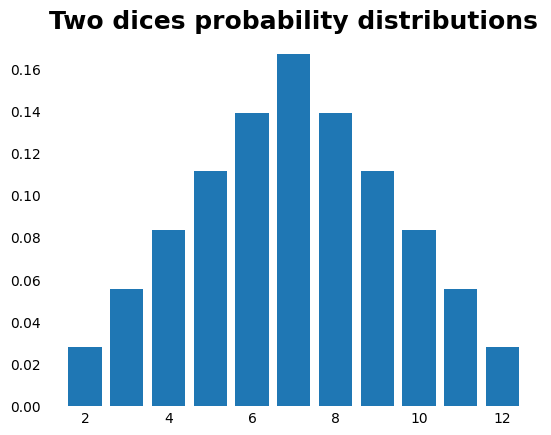

In [25]:
import matplotlib.pyplot as plt

plt.title("Two dices probability distributions", fontsize=18, fontweight="bold")
# remove the bounding box frame
plt.box(on=None)
plt.bar(unique_values, frequencies)
# Remove tick lines in each axis
ax = plt.gca()
ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)


e)

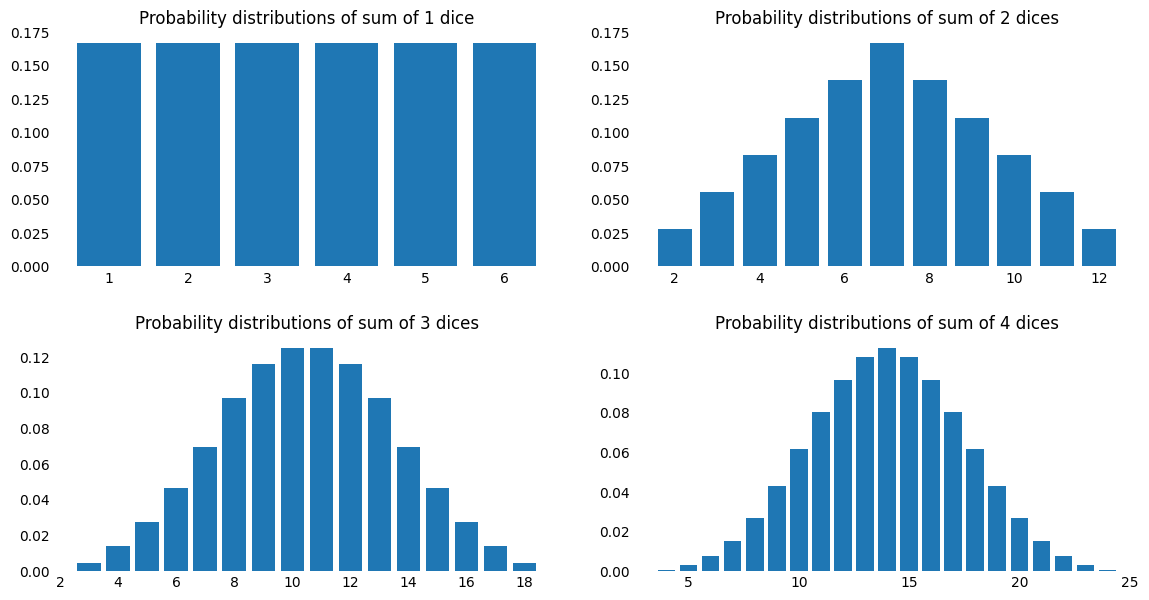

In [79]:
dice_sides = np.arange(1, 7)
distributions = []

for dices in range(1, 5):
    # print(f"Working with {dices} dice(s):")

    # Crate an array of all possible dice combinations,
    # each dice will add one dimension to the resulting array
    mgrids = np.meshgrid(*[dice_sides] * dices)
    # print("\nmgrids = ")
    # print(mgrids)

    # Create an array of all possible values (sum of the dices' values),
    # should have on dimension fewer than mgrids
    summed_values = np.add.reduce(mgrids)
    # print("\summed_values = ")
    # print(summed_values)

    unique_values, val_count = np.unique(summed_values, return_counts=True)
    # print("unique_values = ")
    # print(unique_values)
    # print("val_count = ")
    # print(val_count)
    total_val_count = val_count.sum()
    frequencies = val_count / total_val_count
    # print("frequencies = ")
    # print(frequencies)

    distribution = {
        "dices": dices,
        "values": unique_values,
        "value_frequencies": frequencies,
    }
    distributions.append(distribution)
    

    # sum_grid = mgrids[0]
    # if dices > 1:
    #     for g in mgrids[1:]:
    #         sum_grid = sum_grid + g

    # print("\nsum_grid = ")
    # print(sum_grid)
    
    # values = np.sum(grids)
    # print("\nvalues = ")
    # print(values)
    
    print()

fig = plt.figure(figsize=(14, 7))
ax = fig.subplots(2,2)
fig.subplots_adjust(hspace=0.3, wspace=0.15)

for distribution in distributions:
    dices = distribution["dices"]
    unique_values = distribution["values"]
    frequencies = distribution["value_frequencies"]

    x = dices // 3
    y = abs((dices % 2) - 1)
    current_ax = ax[x, y]

    title = f"Probability distributions of sum of {dices} dice"
    title += "s" if dices > 1 else ""
    current_ax.set_title(title)
    current_ax.bar(unique_values, frequencies)

    # remove frame:
    spines = ["top", "right", "bottom", "left"]
    for spine in spines:
        current_ax.spines[spine].set_visible(False)
    # remove ticks on each axis
    current_ax.xaxis.set_tick_params(length=0)
    current_ax.yaxis.set_tick_params(length=0)

# ax[0, 0].set_title("Probability distributions of sum of 1 dice")

# ax[0, 1].set_title("Probability distributions of sum of 2 dices")

# ax[1, 0].set_title("Probability distributions of sum of 3 dices")

# ax[1, 1].set_title("Probability distributions of sum of 4 dices")

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="https://raw.githubusercontent.com/everyloop/Python-AI23/c67e305ebb670c96fe2879d5949a1a62b0f6f92b/Assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---

## My solutions:

a)

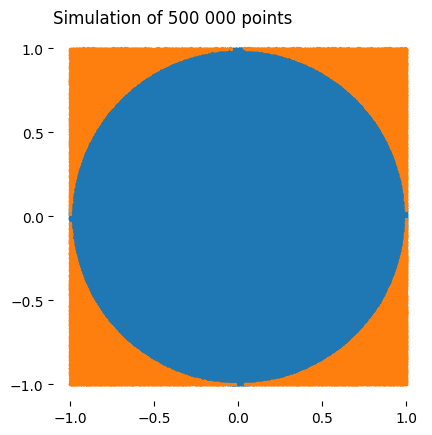

In [153]:
POINTS_COUNT = 500_000

plt.title("Simulation of 500 000 points", loc="left")

# Set aspect ration to 1:1
plt.gca().set_aspect("equal")

# Hide the black frame 
for edge in ["top", "right", "bottom", "left"]:
    plt.gca().spines[edge].set_visible(False)

# Set customer axis values
axis_values = [-1.0, -0.5, 0.0, 0.5, 1.0]
plt.xticks(axis_values)
plt.yticks(axis_values)

x_cords = np.random.uniform(-1, 1, size=POINTS_COUNT)
y_cords = np.random.uniform(-1, 1, size=POINTS_COUNT)
distances = np.sqrt(x_cords**2 + y_cords**2)

# create boolean masks to filter points within/outside of range
within_mask = distances < 1
outside_mask = np.invert(within_mask)

# scatter (blue) points within range
x_cords_within = x_cords[within_mask]
y_cords_within = y_cords[within_mask]
plt.scatter(x_cords_within, y_cords_within, marker="o", s=2)

#scatter (orange) points outside of range
x_cords_outside = x_cords[outside_mask]
y_cords_outside = y_cords[outside_mask]
plt.scatter(x_cords_outside, y_cords_outside, marker="o", s=2)

b)

In [151]:
import math

points_within = x_cords_within.size
fraction_within = points_within / POINTS_COUNT
print(f"{points_within:,} ({fraction_within:.2%}) of {POINTS_COUNT:,} points " +
      "have a distance < 1 from the origin point.")

radius = 1
circle_area = math.pi*radius**2
square_area = (2*radius)**2
area_fraction = circle_area / square_area
print("As the number of points reaches infinity, the fraction of points with " +
      f"a distance < 1 should be around {area_fraction:6f}.")

deviation = abs(fraction_within - area_fraction) / area_fraction
print(f"The simulation above deviated from that number by {deviation:%}")

3,926,941 (78.54%) of 5,000,000 points have a distance < 1 from the origin point.
As the number of points reaches infinity, the fraction of points with a distance < 1 should be around 0.785398.
The simulation above deviated from that number by 0.001269%
